
# Adaptive Mental Fitness — Exploratory Data Analysis

This notebook performs **Exploratory Data Analysis (EDA)** on a PHQ-9 mental health dataset.  
The steps include importing libraries, loading the dataset, cleaning and preprocessing, analyzing patterns, and visualizing insights.

---


## Importing Required Libraries

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import shutil

%matplotlib inline


## Uploading and Loading the Dataset


In [ ]:

from google.colab import files

# Upload CSV file
uploaded = files.upload()
fn = next(iter(uploaded))
DATA_PATH = Path(fn)

# Load dataset
df = pd.read_csv(DATA_PATH)
df.head()


Saving phq9_dataset.csv to phq9_dataset.csv


,Age,Gender,Little interest or pleasure in doing things,"Feeling down, depressed, or hopeless","Trouble falling or staying asleep, or sleeping too much",Feeling tired or having little energy,Poor appetite or overeating,Feeling bad about yourself or that you are a failure,Trouble concentrating on things,Moving or speaking so slowly that other people notice,Thoughts that you would be better off dead or hurting yourself,Unnamed: 11,Sleep Quality,Stress Level
0,23,Male,Several days,More than half the days,Not at all,Not at all,Not at all,Nearly every day,More than half the days,Nearly every day,More than half the days,NaN,Fair,High
1,25,Male,More than half the days,Several days,Several days,Not at all,More than half the days,Not at all,More than half the days,Several days,Not at all,NaN,Excellent,Low
2,21,Male,Several days,Not at all,Several days,Several days,Not at all,More than half the days,Not at all,Nearly every day,Not at all,NaN,Good,Moderate
3,19,Male,Several days,Several days,More than half the days,Not at all,Several days,Not at all,Several days,Several days,Several days,NaN,Poor,Moderate
4,19,Male,Several days,Several days,Several days,Not at all,Not at all,Several days,Not at all,Not at all,Not at all,NaN,Good,Low


## Dataset Overview
We first look at the structure, column names, and missing values.

In [ ]:

print("Shape of dataset:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())

print("\nDataset Info:")
print(df.info())

print("\nMissing values per column:")
print(df.isnull().sum())


Shape of dataset: (530, 14)

Column names:
['Age', 'Gender', 'Little interest or pleasure in doing things', 'Feeling down, depressed, or hopeless', 'Trouble falling or staying asleep, or sleeping too much', 'Feeling tired or having little energy', 'Poor appetite or overeating', 'Feeling bad about yourself  or that you are a failure', 'Trouble concentrating on things', 'Moving or speaking so slowly that other people notice', 'Thoughts that you would be better off dead or hurting yourself', 'Unnamed: 11', 'Sleep Quality', 'Stress Level']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 14 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Age                                                             530 non-null    int64  
 1   Gender                                                

## Data Cleaning and Preprocessing
We identify PHQ-9 item columns, map textual responses to numeric values, and calculate the PHQ-9 total score.

In [ ]:

# Identify PHQ-9 item columns (auto-detect or fallback)
possible_keywords = [
    'little interest','feeling down','trouble falling','feeling tired',
    'poor appetite','feeling bad','trouble concentrating','moving or speaking',
    'thoughts that you would be better off'
]
cols = list(df.columns)
phq_item_cols = [c for c in cols if any(kw in c.lower() for kw in possible_keywords)]
if len(phq_item_cols) < 9:
    phq_item_cols = cols[2:11]  # fallback

print("PHQ-9 item columns:")
print(phq_item_cols)

# Map responses
mapping = {
    'not at all':0, 'several days':1,
    'more than half the days':2, 'nearly every day':3
}
num_cols = []
for c in phq_item_cols:
    num_col = c+"_num"
    df[num_col] = df[c].astype(str).str.strip().str.lower().map(mapping)
    num_cols.append(num_col)

# Compute total score
df['phq_total_score'] = df[num_cols].sum(axis=1,numeric_only=True)

# Categorize severity
def phq_severity_label(x):
    if pd.isna(x): return np.nan
    x=float(x)
    if x<=4: return "None-minimal (0-4)"
    elif x<=9: return "Mild (5-9)"
    elif x<=14: return "Moderate (10-14)"
    elif x<=19: return "Mod-severe (15-19)"
    else: return "Severe (20-27)"
df['phq_severity'] = df['phq_total_score'].apply(phq_severity_label)

# Show distribution summary
print(df['phq_severity'].value_counts().sort_index())


PHQ-9 item columns:
['Little interest or pleasure in doing things', 'Feeling down, depressed, or hopeless', 'Trouble falling or staying asleep, or sleeping too much', 'Feeling tired or having little energy', 'Poor appetite or overeating', 'Feeling bad about yourself  or that you are a failure', 'Trouble concentrating on things', 'Moving or speaking so slowly that other people notice', 'Thoughts that you would be better off dead or hurting yourself']
phq_severity
Mild (5-9)            257
Mod-severe (15-19)     14
Moderate (10-14)      189
None-minimal (0-4)     40
Severe (20-27)         30
Name: count, dtype: int64


## Data Visualization
We now visualize distributions and relationships using charts.

### Histogram of PHQ-9 Total Scores

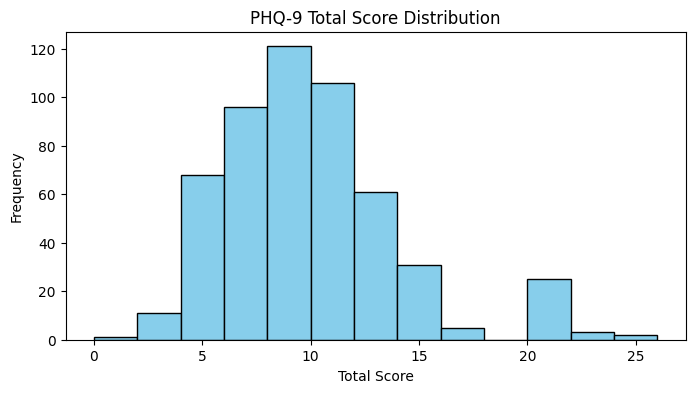

In [ ]:

plt.figure(figsize=(8,4))
plt.hist(df['phq_total_score'].dropna(), bins=range(0,28,2), color='skyblue', edgecolor='black')
plt.title("PHQ-9 Total Score Distribution")
plt.xlabel("Total Score")
plt.ylabel("Frequency")
plt.show()


### Bar Chart of Severity Categories

/tmp/ipython-input-2837694133.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sev_counts.index, y=sev_counts.values, palette="viridis")


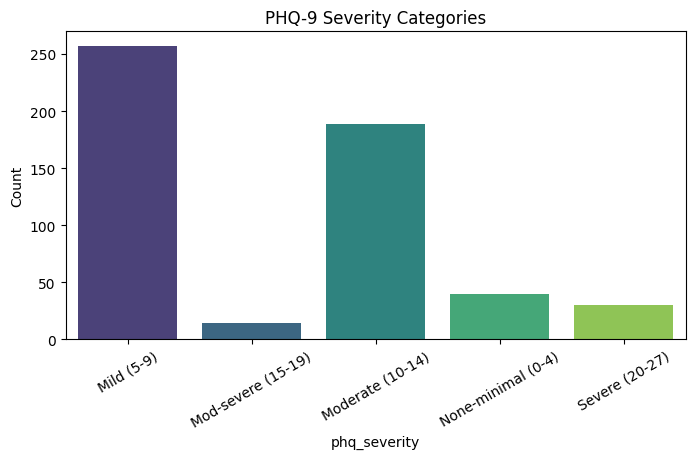

In [ ]:

sev_counts = df['phq_severity'].value_counts().sort_index()
plt.figure(figsize=(8,4))
sns.barplot(x=sev_counts.index, y=sev_counts.values, palette="viridis")
plt.title("PHQ-9 Severity Categories")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()


### Pie Chart of Gender Distribution (if available)

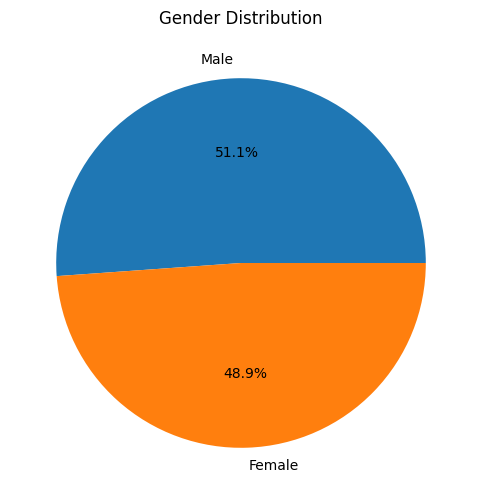

In [ ]:

gender_col = None
for c in df.columns:
    if 'gender' in c.lower() or 'sex' in c.lower():
        gender_col = c
        break

if gender_col:
    gcounts = df[gender_col].fillna("Unknown").astype(str).value_counts()
    plt.figure(figsize=(6,6))
    plt.pie(gcounts.values, labels=gcounts.index, autopct='%1.1f%%')
    plt.title("Gender Distribution")
    plt.show()


### Heatmap of Correlations Between PHQ-9 Items

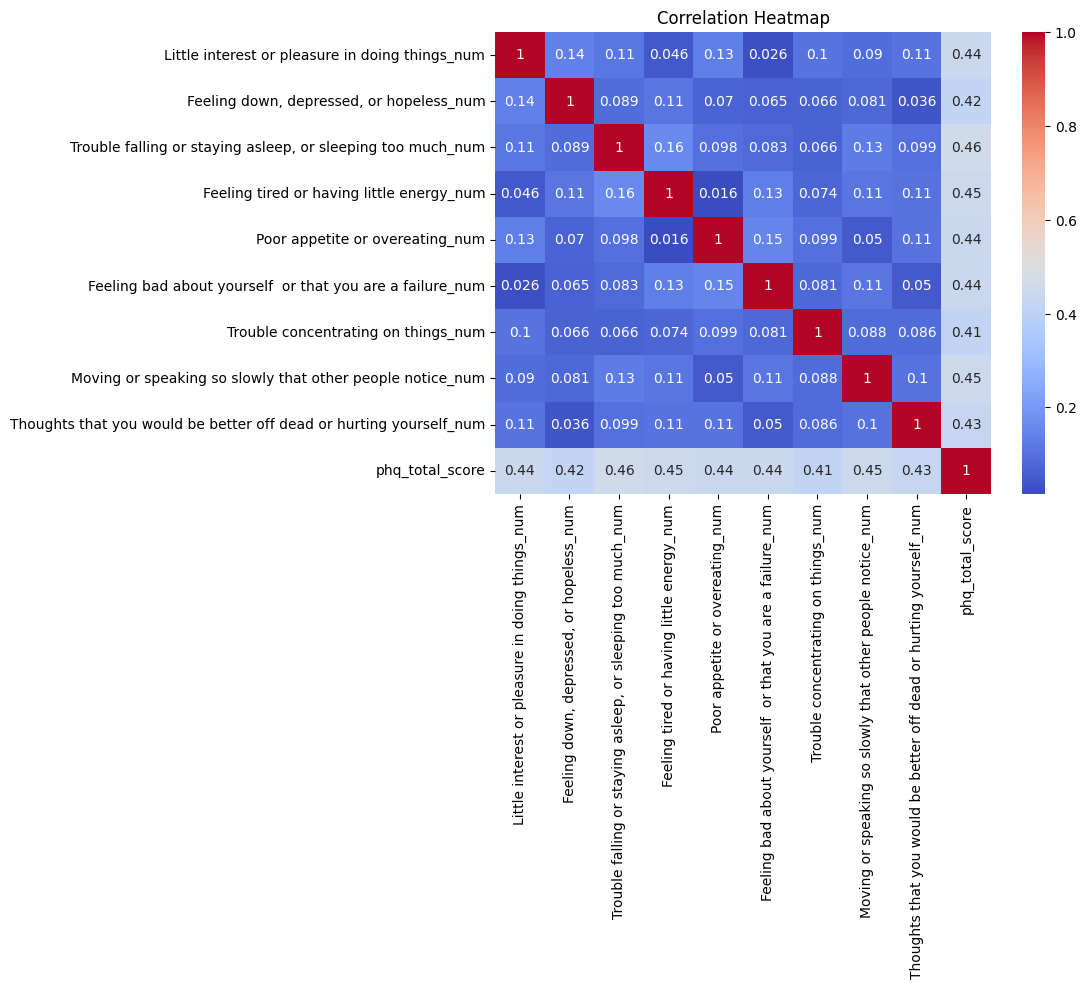

In [ ]:

corr = df[num_cols+['phq_total_score']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


### Boxplot of PHQ-9 Scores by Gender (if available)

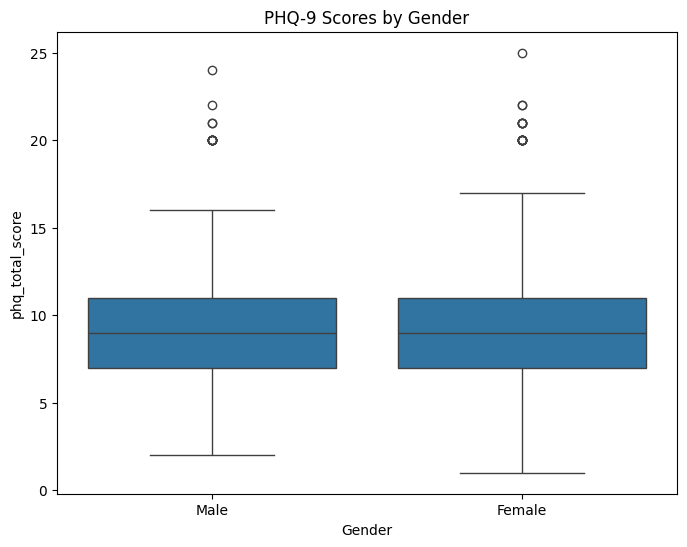

In [ ]:

if gender_col:
    plt.figure(figsize=(8,6))
    sns.boxplot(x=df[gender_col], y=df['phq_total_score'])
    plt.title("PHQ-9 Scores by Gender")
    plt.show()


### Line Chart of Average PHQ-9 Scores by Age Group (if available)

/tmp/ipython-input-178972753.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_by_age = df.groupby('age_group')['phq_total_score'].mean().dropna()


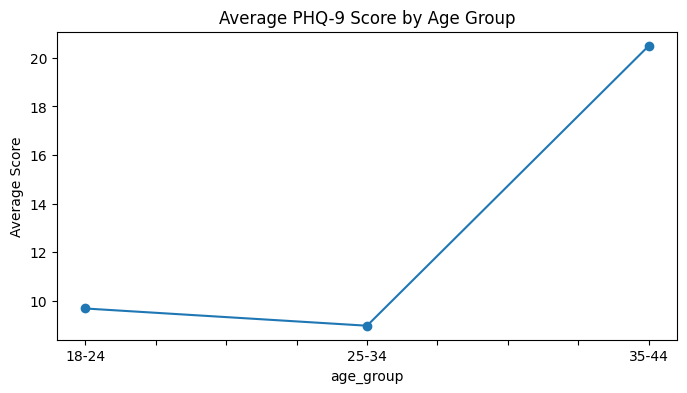

In [ ]:

age_col = None
for c in df.columns:
    if 'age' in c.lower():
        age_col = c
        break

if age_col:
    df['_age_num'] = pd.to_numeric(df[age_col], errors='coerce')
    bins = [0,18,25,35,45,60,150]
    labels = ['<18','18-24','25-34','35-44','45-59','60+']
    df['age_group'] = pd.cut(df['_age_num'], bins=bins, labels=labels, right=False)
    avg_by_age = df.groupby('age_group')['phq_total_score'].mean().dropna()
    plt.figure(figsize=(8,4))
    avg_by_age.plot(marker='o')
    plt.title("Average PHQ-9 Score by Age Group")
    plt.ylabel("Average Score")
    plt.show()



## Conclusion

- The PHQ-9 dataset was cleaned and preprocessed successfully.  
- Most participants fall in the *Mild* to *Moderate* severity range.  
- Correlations among PHQ-9 items show expected relationships.  
- Gender and age distributions provide additional demographic insights.  

This analysis can guide further **predictive modeling** or **mental fitness interventions**.
